attempt to do everything in a more efficient way. jan 30

In [1]:
from conv_reproj import match
from align_and_diff import a_d
from header_setup import read

from matplotlib import pyplot as plt
import numpy as np

from astropy.io import fits
from pm import pm_correct
from astropy import units as u
from astropy.wcs import WCS
import cmasher as cmr

from astropy.time import Time
from astropy.coordinates import SkyCoord

Match function imported.
running


In [2]:
from everything import full_analysis

Ready to go!


In [3]:
from radial import radial_read
from dens import density_model

In [4]:
from everything import plot_1d, plot_2d

## HR data (star): Betelgeuse_TE_cont_R0.image.image.tt0.fits
## LR data (star+CSM): Betelgeuse_all_cont_1-1.image.image.tt0.fits

In [5]:
1.0*u.Jy/u.arcsec**2

<Quantity 1. Jy / arcsec2>

In [6]:
hr = 'jan29_data/from_server/Betelgeuse_TE_cont_R0.image.image.tt0.fits'
lr = 'jan29_data/from_server/Betelgeuse_all_cont_1-1.image.image.tt0.fits'
data3, data_1d3, radius3, data_dens_1d3, data_dens_2d3, data_plot3, info3 = full_analysis(hr,lr)
# this should be lr
info3['lr']['kspatres']
# this should be hr


False
First epoch shifted to second.
Header information imported.
Header information imported.


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

Alignment and subtraction complete. Info dictionaries imported.


/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(functio

0.040566339161841755

In [7]:
info3['hr']['kspatres']
info3['hr']['cmap'] = cmr.flamingo
info3['lr']['cmap'] = cmr.flamingo
info3['lr_add']['cmap'] = cmr.flamingo
info3['reproj']['cmap'] = cmr.flamingo
info3['reproj_add']['cmap'] = cmr.flamingo
info3['csm']['cmap'] = cmr.flamingo#"PRGn"

In [8]:
# def plot_1d(data_1d,data_dens_1d,info,radius,ax1_ymin=1e-2,ax2_ymin=1e-3, ax1_ymax=1e4,ax2_ymax=1e3,xmin=0,xmax=0.45):
#     '''
#     plot 1d density and intensity functions.
#     can select plot x and y limits. default values inputted otherwise
#     '''
#     lowcolor = 'steelblue'
#     highcolor='crimson'


#     plt.rcParams["font.family"] = "times"
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [14,4])
#     fig.suptitle("1D Radial Intensity and Density Plots using original dimension data")

#     title = ['hr','lr','reproj','csm', 'hr_dens','lr_dens', 'reproj_dens','csm_dens']
#     labels = ['{res}"'.format(res = np.round(info['hr']['kspatres'],3)),
#              '{res}"'.format(res = np.round(info['lr']['kspatres'],3)),
#                "reproj", "csm"]    
    
#     color = [highcolor,lowcolor,'maroon','fuchsia']


#     c=0
#     j=0
#     for j in range(len(title)):
#         if j==4:
#             c=0
        
#         if j<4:
#             ax1.plot(radius[title[c]]['arc_1d'],data_1d[title[c]].value,'o-', label = labels[c], c = color[c])
#             ax1.errorbar(radius[title[c]]['arc_1d'],data_1d[title[c]].value,yerr=info['median'], c = color[c])
#         else:
            
#             ax2.plot(radius[title[c]]['arc_1d'],data_dens_1d[title[c]].value,'o-',label = labels[c], c = color[c])
#             ax2.errorbar(radius[title[c]]['arc_1d'],data_dens_1d[title[c]].value,yerr=np.abs(info[title[c]]['median_dens']).value, c = color[c])
    
#         c+=1

#     ax2.legend(loc = 'best', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5))
#     ax2.set_xlim(xmin,xmax)
#     ax1.set_xlim(0,0.45)
#     ax1.set_ylim(ax1_ymin, ax1_ymax)
#     ax2.set_ylim(ax2_ymin, ax2_ymax)

#     ax1.semilogy()
#     ax2.semilogy()
#     ax1.set_title("1-D Radial Intensity Comparison")
#     ax2.set_title("1-D Radial Density Comaprison")
#     ax1.set_xlabel('Radius (arc)')
#     ax2.set_xlabel('Radius (arc)')
#     ax1.set_ylabel('Intensity (Jy/arc2)')
#     ax2.set_ylabel('Density (g/cm2)')

#     fig.show()


In [9]:
# from astropy.stats import sigma_clipped_stats
# from photutils.detection import DAOStarFinder
# from photutils.aperture import aperture_photometry, CircularAperture, CircularAnnulus

# r_betelgeuse = 29.50*1e-3*u.arcsec


# lowcolor = 'steelblue'
# highcolor='crimson'

# #defining constants for density model

# def sm(dist, ang_size):
#     '''
#     takes ang size arsec
#     distance pc
#     returns diam in pc
#     '''
#     diam = (ang_size*dist)/206265

#     return diam

# def rp_annulus(data,info):
#     '''
#     data, pix size in arcsec, position of center star
#     '''

#     pix_size_arcsec = info['pix_size_arcsec']
#     position = info['position']

#     cent = (position[1],position[0])

#     aperture_size = r_betelgeuse.value / pix_size_arcsec.value #put in pixel units
#     aperture = CircularAperture(cent,aperture_size)
#     photometry = aperture_photometry(data,aperture)
#     # print()
#     # print("Photometry: ", photometry)

#     aperture_sizes = np.arange(1,200,1)
#     error = np.full((data.shape[0],data.shape[1]),info['median'])
#     annuli=[CircularAnnulus(cent, r_in=aperture_sizes[i], r_out=aperture_sizes[i+1]) for i in range(len(aperture_sizes)-1)]
#     areas = np.array([circle.area for circle in annuli])*pix_size_arcsec**2
#     # print(apertures)
    
    
#     photometry = aperture_photometry(data, annuli,error=error)
#     #print(photometry.items())
#     phot_list = []
#     phot_list_err = []
#     for k,v in photometry.items():
#         # print("k",k)
#         # print("v",v)
#         if 'aperture_sum' in k and 'err' not in k:
#             # print("A ",v)
#             phot_list.append(v)
#         elif 'aperture_sum_err' in k:
#             # print("B",v.value)
#             phot_list_err.append(v.value)

#     phot_array = np.array(phot_list)
#     # print("phot_array",phot_array)
#     # print("err",phot_list_err)
#     phot_array_err = np.array(phot_list_err)
#     #print(phot_list)
#     surf_brightness_jy_arc2 = phot_array.flatten()*u.Jy / (areas)
#     errors = phot_array_err.flatten()*u.Jy/areas

#     centers_arc = ((aperture_sizes[1:]+aperture_sizes[:-1])/2)*pix_size_arcsec
#     centers_pc = sm(168,centers_arc).value*u.pc

#     centers = {'pc': centers_pc, 'arc': centers_arc}

#     return centers,surf_brightness_jy_arc2,errors

In [10]:
#error = np.full((data3['lr']['jy_arc2'][0,0,...].shape[0],data3['lr']['jy_arc2'][0,0,...].shape[1]),info3['lr']['median'])

In [11]:
info3['lr']['median']

<Quantity 0.00100667>

In [12]:
info3['lr']['error']

<Quantity [13.11625567, 10.15980796,  8.58660492,  7.57267374,  6.84974113,
            6.30084542,  5.86576786,  5.50992948,  5.21187151,  4.95747866,
            4.73703488,  4.54360425,  4.37208522,  4.21863063,  4.08027706,
            3.95469988,  3.84004646,  3.73481968,  3.6377948 ,  3.54795884,
            3.46446576,  3.38660265,  3.31376397,  3.2454316 ,  3.18115927,
            3.12056021,  3.06329736,  3.00907542,  2.95763444,  2.90874456,
            2.86220164,  2.81782373,  2.77544803,  2.73492837,  2.69613309,
            2.65894327,  2.62325113,  2.5889588 ,  2.55597708,  2.52422458,
            2.49362679,  2.46411537,  2.43562753,  2.40810543,  2.38149572,
            2.35574906,  2.3308198 ,  2.30666557,  2.28324704,  2.2605276 ,
            2.23847315,  2.21705186,  2.19623401,  2.17599179,  2.15629915,
            2.13713167,  2.1184664 ,  2.10028181,  2.08255759,  2.06527466,
            2.04841499,  2.03196159,  2.0158984 ,  2.00021024,  1.98488273,
            

In [44]:
info3['hr']['error']

<Quantity [5.39105971, 4.1758969 , 3.52927703, 3.11252978, 2.81538911,
           2.58978132, 2.4109552 , 2.26469806, 2.14218991, 2.03762904,
           1.94702197, 1.86751787, 1.7970199 , 1.73394681, 1.67708055,
           1.62546566, 1.57834067, 1.53509023, 1.49521094, 1.45828645,
           1.42396902, 1.39196563, 1.36202739, 1.33394133, 1.30752404,
           1.28261654, 1.25908029, 1.23679392, 1.21565059, 1.1955558 ,
           1.17642568, 1.15818541, 1.1407681 , 1.12411366, 1.10816797,
           1.09288217, 1.07821194, 1.06411706, 1.05056088, 1.03750993,
           1.02493358, 1.01280376, 1.00109466, 0.98978249, 0.97884533,
           0.96826291, 0.95801645, 0.94808855, 0.93846304, 0.92912486,
           0.92006002, 0.91125541, 0.90269883, 0.89437885, 0.88628476,
           0.87840651, 0.87073469, 0.86326044, 0.85597541, 0.84887176,
           0.84194208, 0.83517938, 0.82857707, 0.8221289 , 0.81582897,
           0.80967168, 0.80365173, 0.79776409, 0.79200399, 0.78636688,
      

/Users/iman/Documents/almanalysis/streamlined/everything.py:181: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


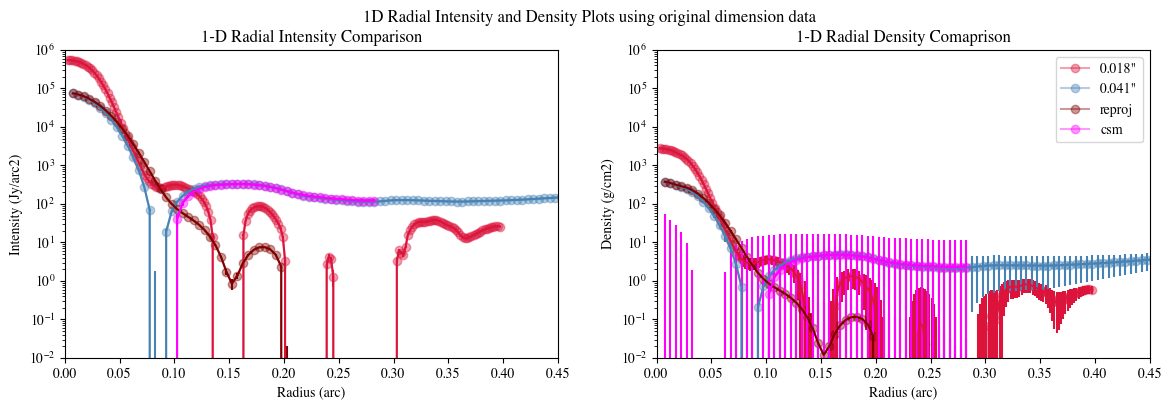

In [13]:
plot_1d(data_1d3, data_dens_1d3,info3,radius3,ax1_ymin=1e-2,ax1_ymax=1e6,ax2_ymin=1e-2,ax2_ymax=1e6)#,xmax=0.35)
#plot_1d(data_1d3, data_dens_1d3,info3,radius3,ax1_ymin=-1e-1,ax1_ymax=6e5,ax2_ymin=1e0,ax2_ymax=1e1)#,xmax=0.35)

In [14]:
r_betelgeuse = 29.50*1e-3*u.arcsec

In [15]:
data3['hr']['jy_arc2'][0,0,100,150]

<Quantity 0.00158239>

In [16]:
info3['lr']['median']

<Quantity 0.00100667>

confused on how to calculate the medians

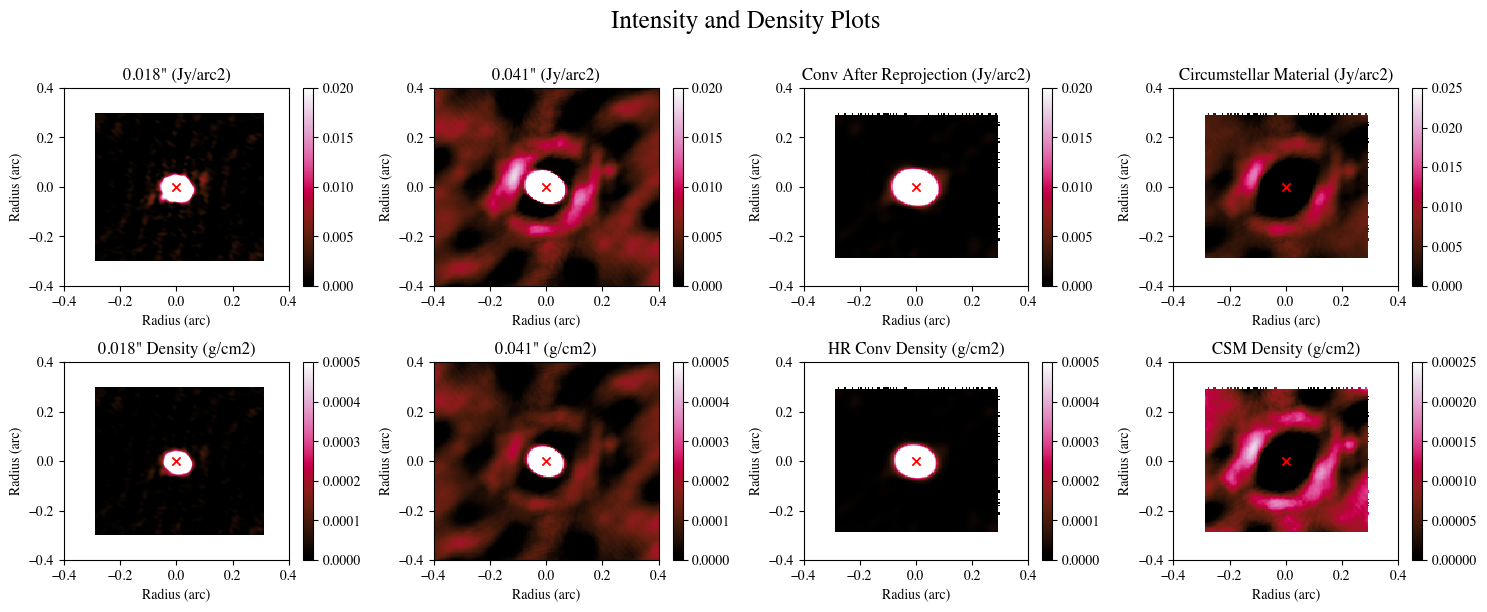

In [17]:
# vminmax = [[0,2], [0,2],[0,2],[-.075,0.075],
#            [0,0.015], [0,0.01],[0,0.01],[-0.00075,0.00075]]
# vminmax = [[0,.02], [0,.02],[0,.02],[-.025,0.025],
#            [0,0.0005], [0,0.0005],[0,0.0005],[-0.00025,0.00025]]
vminmax = [[0,.02], [0,.02],[0,.02],[0,0.025],
           [0,0.0005], [0,0.0005],[0,0.0005],[0,0.00025]]
plot_2d(data_plot3, info3, vminmax,minn=-.4)

In [18]:
info3['hr']['kspatres']

0.018229371903607936

In [19]:
info3['lr']['kspatres']

0.040566339161841755

In [20]:
lr = 'jan29_data/from_server/Betelgeuse_TC_cont.image.image.pbcor.fits'
hr = 'jan29_data/from_server/Betelgeuse_all_cont_1-1.image.image.tt0.fits'
data1, data_1d1, radius1, data_dens_1d1, data_dens_2d1, data_plot1, info1 = full_analysis(hr,lr)

indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

False
First epoch shifted to second.
Header information imported.
Header information imported.


Alignment and subtraction complete. Info dictionaries imported.


/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(functio

In [21]:
# this should be lr
info1['lr']['kspatres']

0.18444060410509736

In [22]:
# this should be hr
info1['hr']['kspatres']

0.040566339161841755

In [23]:
info1['hr']['cmap'] = cmr.flamingo
info1['lr']['cmap'] = cmr.flamingo
info1['lr_add']['cmap'] = cmr.flamingo
info1['reproj']['cmap'] = cmr.flamingo
info1['reproj_add']['cmap'] = cmr.flamingo
info1['csm']['cmap'] = cmr.flamingo#"PRGn"

In [24]:
info1['lr']['median']

<Quantity -9.43644409e-05>

/Users/iman/Documents/almanalysis/streamlined/everything.py:181: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


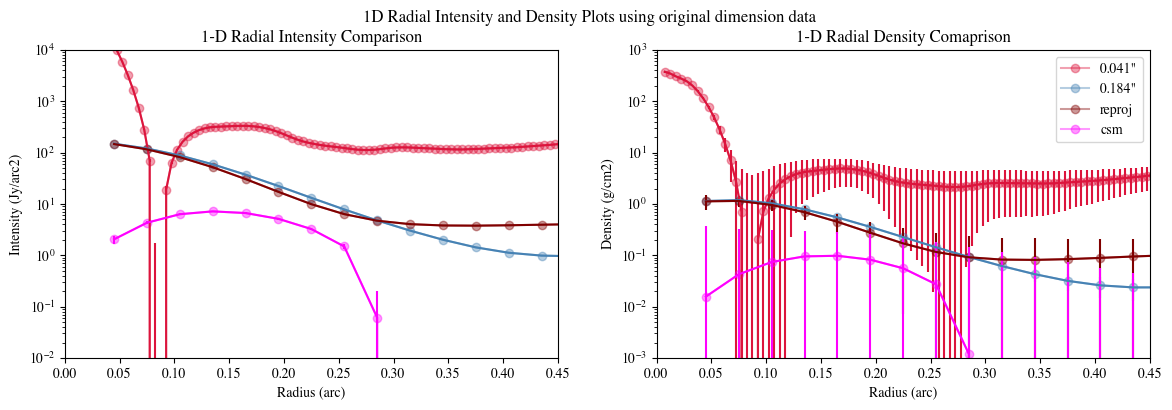

In [25]:
plot_1d(data_1d1, data_dens_1d1,info1,radius1)

In [26]:
# vminmax = [[0,2], [0,.2],[0,.2],[0,0.02],
#            [0,0.02], [0,0.002],[0,0.002],[0,0.0005]]

vminmax = [[0,.02], [0,.2],[0,.2],[0,0.02],
           [0,0.0006], [0,0.0014],[0,0.0014],[0,0.0004]]

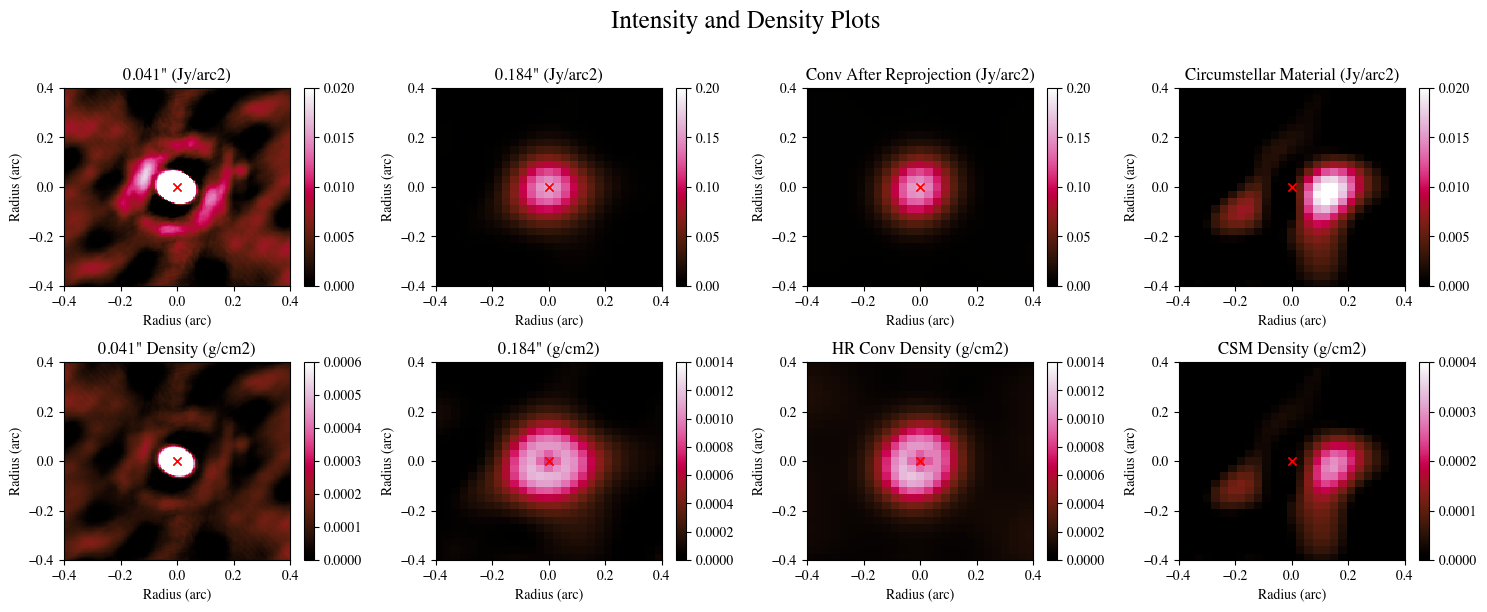

In [27]:
plot_2d(data_plot1, info1, vminmax, minn=-.4)

# With reverse lr hr order (I think)

In [28]:
hr = 'jan29_data/from_server/Betelgeuse_TC_cont.image.image.pbcor.fits'
lr = 'jan29_data/from_server/Betelgeuse_all_cont_1-1.image.image.tt0.fits'
data2, data_1d2, radius2, data_dens_1d2, data_dens_2d2, data_plot2, info2 = full_analysis(hr,lr)
# this should be lr
info2['lr']['kspatres']
# this should be hr


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

True
Second epoch shifted to first.
Header information imported.
Header information imported.
Alignment and subtraction complete. Info dictionaries imported.


/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(functio

0.040566339161841755

In [29]:
info2['hr']['kspatres']
info2['hr']['cmap'] = cmr.flamingo
info2['lr']['cmap'] = cmr.flamingo
info2['lr_add']['cmap'] = cmr.flamingo
info2['reproj']['cmap'] = cmr.flamingo
info2['reproj_add']['cmap'] = cmr.flamingo
info2['csm']['cmap'] = "PRGn"

/Users/iman/Documents/almanalysis/streamlined/everything.py:181: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


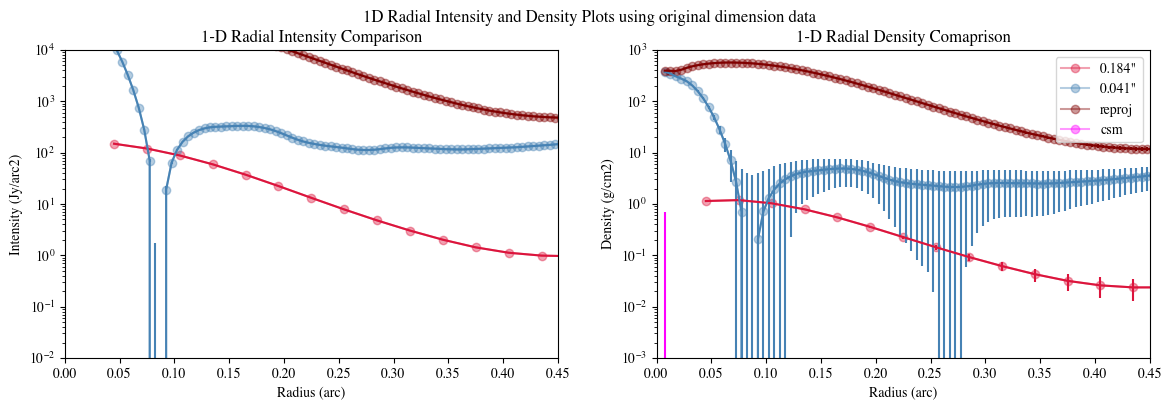

In [30]:
plot_1d(data_1d2, data_dens_1d2,info2,radius2)

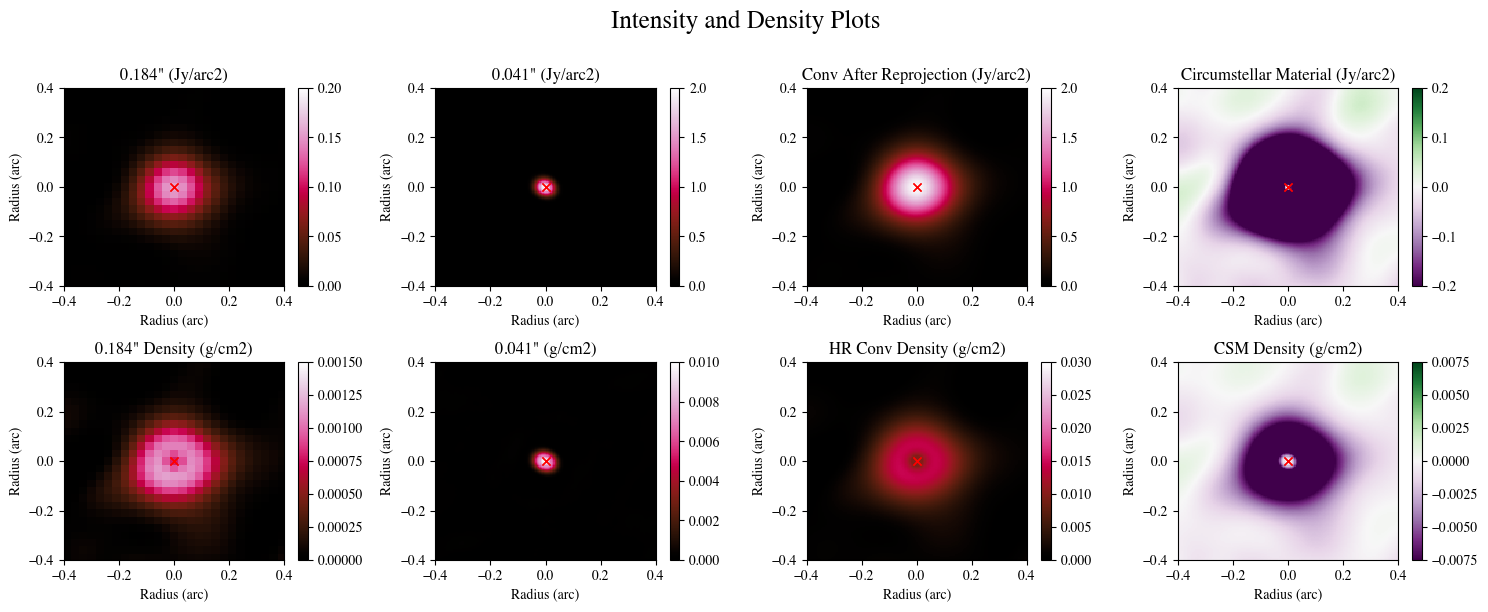

In [31]:
vminmax = [[0,.2], [0,2],[0,2],[-.2,0.2],
           [0,0.0015], [0,0.01],[0,0.03],[-0.0075,0.0075]]
plot_2d(data_plot2, info2, vminmax,minn=-.4)

# lowest lowest and highest highest

In [32]:
lr = 'jan29_data/from_server/Betelgeuse_TC_cont.image.image.pbcor.fits'
hr = 'jan29_data/from_server/Betelgeuse_TE_cont_R0.image.image.tt0.fits'
data4, data_1d4, radius4, data_dens_1d4, data_dens_2d4, data_plot4, info4 = full_analysis(hr,lr)

indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

False
First epoch shifted to second.
Header information imported.
Header information imported.


Alignment and subtraction complete. Info dictionaries imported.


/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(functio

In [33]:
info4['hr']['cmap'] = cmr.flamingo
info4['lr']['cmap'] = cmr.flamingo
info4['lr_add']['cmap'] = cmr.flamingo
info4['reproj']['cmap'] = cmr.flamingo
info4['reproj_add']['cmap'] = cmr.flamingo
info4['csm']['cmap'] = cmr.flamingo#"PRGn"

/Users/iman/Documents/almanalysis/streamlined/everything.py:181: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


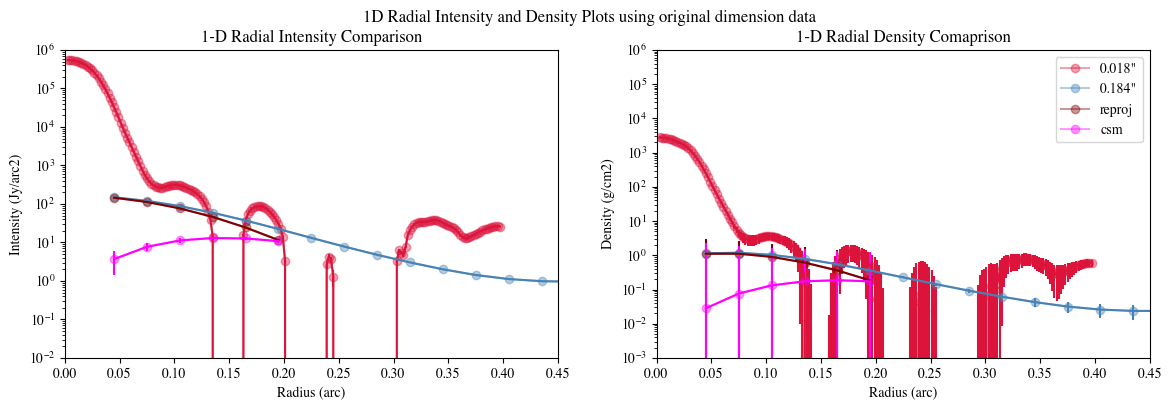

In [37]:
plot_1d(data_1d4, data_dens_1d4,info4,radius4,ax1_ymax=1e6,ax2_ymax=1e6)

In [38]:
info4['lr']['kspatres']

0.18444060410509736

In [39]:
# vminmax = [[0,2], [0,.2],[0,.2],[0,0.02],
#            [0,0.02], [0,0.002],[0,0.002],[0,0.0005]]

vminmax = [[0,.02], [0,.2],[0,.2],[0,0.02],
           [0,0.0006], [0,0.0009],[0,0.0009],[0,0.0004]]

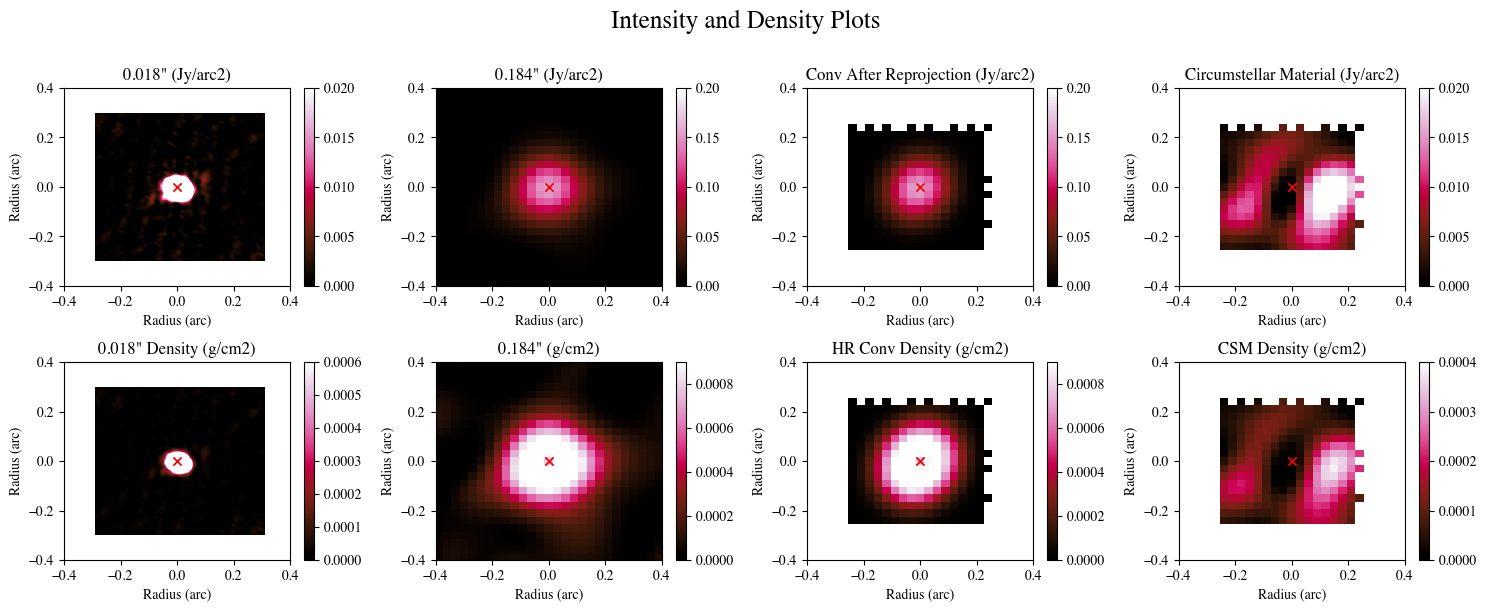

In [40]:
plot_2d(data_plot4, info4, vminmax, minn=-.4)

In [41]:
for key in info4:
    print(info4[key]['kspatres'])

0.018229371903607936
0.18444060410509736


KeyError: 'kspatres'

In [42]:
print(np.round(info4['hr']['kspatres'],4),'" Image')

0.0182 " Image


In [43]:
'{res}" (Jy/arc2)'.format(res = np.round(info4['lr']['kspatres'],3))

'0.184" (Jy/arc2)'